# Normality

In [4]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import anderson,shapiro,normaltest
df = pd.read_csv("seatdata.csv")
df.head()

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151


# Histogram

(array([ 5.,  7., 30., 81., 96., 90., 62., 17.,  7.,  4.]),
 array([ 236.1415432 ,  338.92057858,  441.69961396,  544.47864934,
         647.25768472,  750.0367201 ,  852.81575548,  955.59479086,
        1058.37382624, 1161.15286162, 1263.931897  ]),
 <a list of 10 Patch objects>)

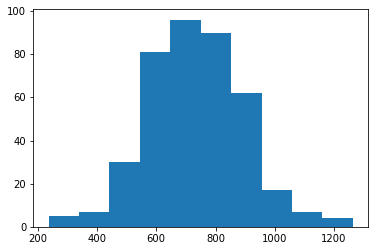

In [5]:
plt.hist(df["SeatX"])

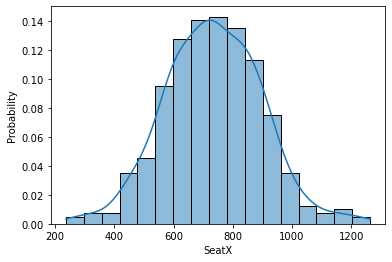

In [26]:
sns.histplot(df["SeatX"], stat = "probability", kde = True)

# qq norm

<function matplotlib.pyplot.show(*args, **kw)>

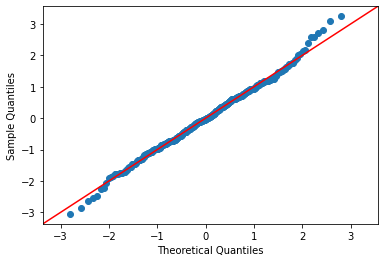

In [27]:
import statsmodels.api as sm
sm.qqplot(df["SeatX"], line = "45", fit = True)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

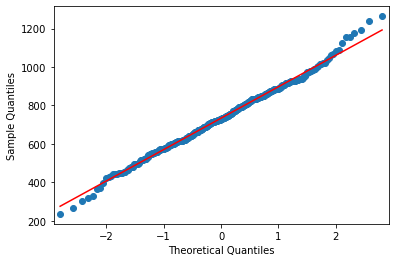

In [28]:
import statsmodels.api as sm
sm.qqplot(df["SeatX"], line = "s")
pyplot.show

# Anderson test

In [21]:
from scipy.stats import anderson
anderson(df["SeatX"], dist = "norm")


AndersonResult(statistic=0.31933234711044634, critical_values=array([0.57 , 0.65 , 0.779, 0.909, 1.081]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [22]:
result=anderson(df["SeatX"], dist = "norm")
print(f'statistic:{round(result.statistic,3)}')

p=0
for i in range(len(result.critical_values)):
    sl,cv=result.significance_level[i],result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print (f'data look normal{sl,cv}')
    else:
         print (f'data not normal{sl,cv}')
  

statistic:0.319
data look normal(15.0, 0.57)
data look normal(10.0, 0.65)
data look normal(5.0, 0.779)
data look normal(2.5, 0.909)
data look normal(1.0, 1.081)


# Shapiro test

In [6]:
from scipy.stats import shapiro
shapiro(df['SeatX'])

ShapiroResult(statistic=0.9959465265274048, pvalue=0.3991289436817169)

In [29]:
%whos

Variable     Type         Data/Info
-----------------------------------
anderson     function     <function anderson at 0x1192fcc10>
df           DataFrame         Stature  Sitting Hei<...>n\n[399 rows x 8 columns]
normaltest   function     <function normaltest at 0x1192ca310>
np           module       <module 'numpy' from '/Us<...>kages/numpy/__init__.py'>
pd           module       <module 'pandas' from '/U<...>ages/pandas/__init__.py'>
plt          module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
pyplot       module       <module 'matplotlib.pyplo<...>es/matplotlib/pyplot.py'>
shapiro      function     <function shapiro at 0x1192fc430>
sm           module       <module 'statsmodels.api'<...>ages/statsmodels/api.py'>
sns          module       <module 'seaborn' from '/<...>ges/seaborn/__init__.py'>


In [12]:
result = shapiro(df['SeatX'])
print (f'statistic : {round(result.statistic,3)} , pvalue : {round(result.pvalue,3)}')

statistic : 0.996 , pvalue : 0.399


In [10]:
alpha = 0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

data is normally distributed


In [16]:
alpha = [0.05 , 0.1 ,0.15 , 0.025 , 0.01]
for i in alpha:
    if result.pvalue > i:
        print(f'data is normally distributed{i,round(result.pvalue,3)}')
    else:
        print(f'data is not normally distributed{i,round(result.pvalue,3)}')

data is normally distributed(0.05, 0.399)
data is normally distributed(0.1, 0.399)
data is normally distributed(0.15, 0.399)
data is normally distributed(0.025, 0.399)
data is normally distributed(0.01, 0.399)


# Agustina Pearson Test

In [31]:
from scipy.stats import normaltest
normaltest(df['SeatX'])

NormaltestResult(statistic=2.4393165170485718, pvalue=0.29533107655845575)

In [42]:
result=normaltest(df['SeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{round(result.pvalue,3)}')
alpha=0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

statistic:2.439, p:0.295
data is normally distributed


# Transform data to Normal Distribution

# log

In [51]:
df['logSeatX']=np.log(df['SeatX']+1)

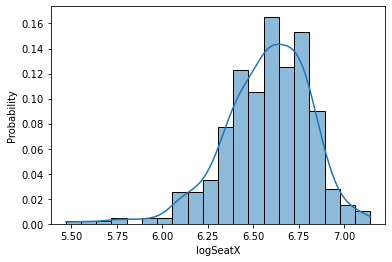

In [32]:
sns.histplot(df["logSeatX"], stat = "probability", kde = True)

In [36]:
result=normaltest(df['logSeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{(result.pvalue,3)}')

statistic:60.362, p:(7.810088516252708e-14, 3)


In [39]:
result=normaltest(df['logSeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{round(result.pvalue,3)}')
alpha=0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

statistic:60.362, p:0.0
data is not normally distributed


# fractional

In [44]:
df['fractionalSeatX']=1/(df['SeatX']+1)

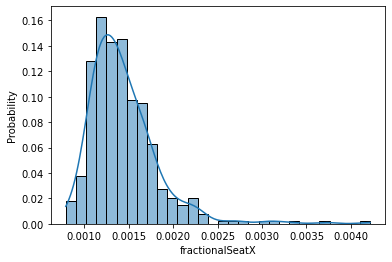

In [45]:
sns.histplot(df["fractionalSeatX"], stat = "probability", kde = True)

In [46]:
result=normaltest(df['fractionalSeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{round(result.pvalue,3)}')
alpha=0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

statistic:231.804, p:0.0
data is not normally distributed


<function matplotlib.pyplot.show(*args, **kw)>

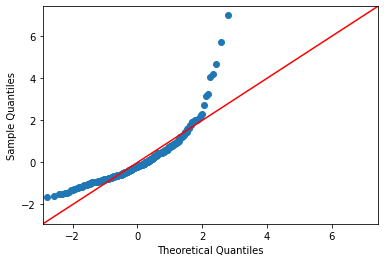

In [48]:
sm.qqplot(df["fractionalSeatX"], line = "45", fit = True)
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

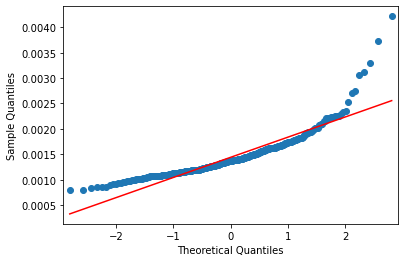

In [49]:
sm.qqplot(df["fractionalSeatX"], line = 's')
pyplot.show

# sqrt 

In [52]:
df['sqrtSeatX']=np.sqrt(df['SeatX'])

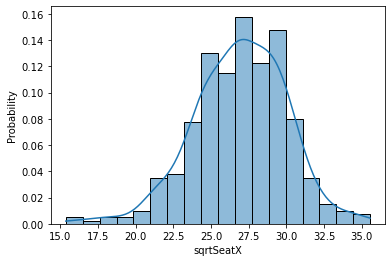

In [53]:
sns.histplot(df["sqrtSeatX"], stat = "probability", kde = True)

In [54]:
result=normaltest(df['sqrtSeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{round(result.pvalue,3)}')
alpha=0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

statistic:13.662, p:0.001
data is not normally distributed


<function matplotlib.pyplot.show(*args, **kw)>

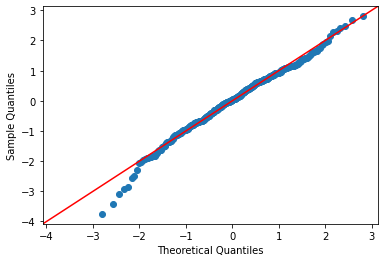

In [55]:
sm.qqplot(df["sqrtSeatX"], line = "45", fit = True)
pyplot.show

<function matplotlib.pyplot.show(*args, **kw)>

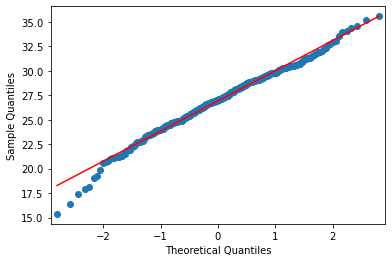

In [57]:
sm.qqplot(df['sqrtSeatX'], line = 's')
pyplot.show

# exponential

In [73]:
df['expSeatX']=(df['SeatX'])**1/5

<function matplotlib.pyplot.show(*args, **kw)>

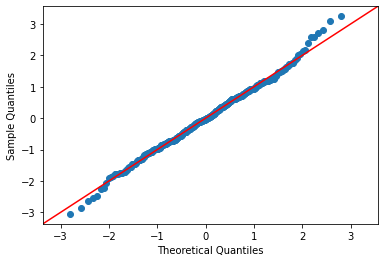

In [75]:
sm.qqplot(df["expSeatX"], line = "45", fit = True)
pyplot.show

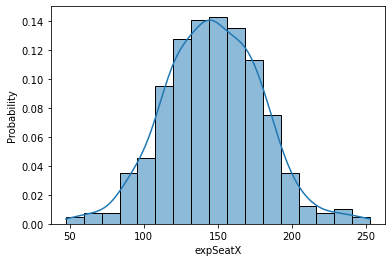

In [65]:
sns.histplot(df["expSeatX"], stat = "probability", kde = True)

In [67]:
result=normaltest(df['expSeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{round(result.pvalue,3)}')
alpha=0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

statistic:2.439, p:0.295
data is normally distributed


In [19]:
df['expSeatX']=np.exp(df['SeatX'])

# reciprocal

In [68]:
df['recipSeatX']=np.reciprocal(df['SeatX'])

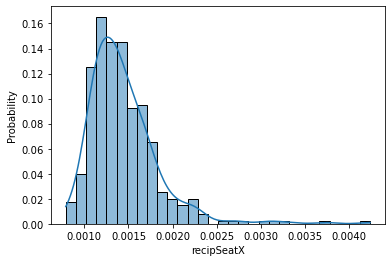

In [69]:
sns.histplot(df["recipSeatX"], stat = "probability", kde = True)

In [70]:
result=normaltest(df['recipSeatX'])
print (f'statistic:{round(result.statistic,3)}, p:{round(result.pvalue,3)}')
alpha=0.05
if result.pvalue > alpha:
    print('data is normally distributed')
else:
    print('data is not normally distributed')

statistic:232.631, p:0.0
data is not normally distributed


<function matplotlib.pyplot.show(*args, **kw)>

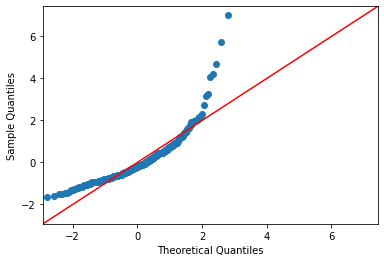

In [71]:
sm.qqplot(df["recipSeatX"], line = "45", fit = True)
pyplot.show